# Triangle Method

In [10]:
from skimage.filters import threshold_triangle
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Read Image

In [11]:
fp = "data/image/1_dev/converted/train/benign/d6b47a09-86ba-49d5-856a-9a89a01d4b4f.png"
img = cv2.imread(fp, cv2.IMREAD_GRAYSCALE)

# Compute Threshold

In [14]:
thresh = threshold_triangle(img)
print(thresh)

1


## Create Histogram

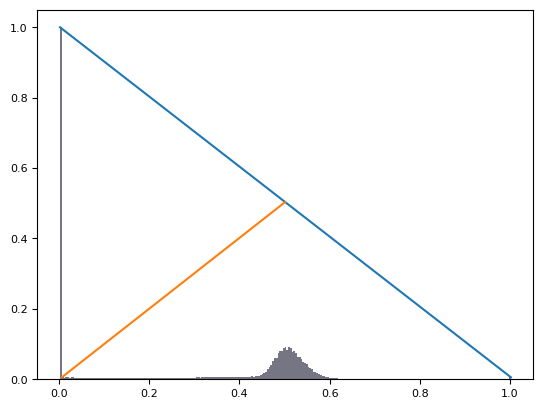

In [13]:
bins = np.arange(0, 256)

# Create a histogram, identify peak and normalize counts between 0 and 1
# Note: here we assume the peak is always to the left and we threshold to the right!
# The proper triangle threshold flips sometimes
hist, bin_edges = np.histogram(img.ravel(), bins=bins)
peak_ind = np.argmax(hist)
peak_height = hist[peak_ind]
hist = hist / peak_height

# Identify bin centers
# Find last bin with non-zero count
centers = (bin_edges[1:] + bin_edges[:-1])/2.0
ind_low, ind_high = np.where(hist > 0)[0][[0, -1]]    

# Shift bin centers according to peak (simplified plotting)
# centers = centers - centers[peak_ind]

# Compute 'width' of the triangle (base length)
# Normalize centers so width becomes 1
width = (centers[ind_high] - centers[peak_ind])
centers = centers / width

# Plot histogram with new values
_ = plt.hist(centers, bins=len(hist), weights=hist, color=(0.1, 0.1, 0.2, 0.6))

# Plot from peak to base
x1 = centers[peak_ind]
y1 = hist[peak_ind]
x2 = centers[-1]
y2 = hist[-1]
_ = plt.plot([x1, x2], [y1, y2])

# Plot from threshold to peak line
x3 = centers[int(thresh)]
y3 = hist[int(thresh)]
n = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
x4 = (y2 - y1) / n
y4 = -(x2 - x1) / n
# Find intersection
# Thank you, wikipedia
# https://en.wikipedia.org/wiki/Line–line_intersection#Given_two_points_on_each_line
D = (x1 - x2)*(y3 - y4) - (y1 - y2)*(x3 - x4)
px = ((x1*y2 - y1*x2)*(x3 - x4) - (x1 - x2)*(x3*y4 - y3*x4))/D
py = ((x1*y2 - y1*x2)*(y3 - y4) - (y1 - y2)*(x3*y4 - y3*x4))/D
_ = plt.plot([x3, px], [y3, py])
